## Importing Required Libraries

In [473]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Read DataFrame

In [452]:
df=pd.read_csv(r"C:\Users\Irfan\Downloads\diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


## Basic Exploration

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              15000 non-null  int64         
 1   order_placed_time     15000 non-null  datetime64[ns]
 2   order_delivered_time  15000 non-null  datetime64[ns]
 3   weak_of_day           15000 non-null  object        
 4   delivery_in_time      15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 586.1+ KB


In [453]:
df['order_placed_time']=df['order_placed_at'].apply(lambda x:str(x).split()[1])

In [454]:
df['order_delivered_time']=df['order_delivered_at'].apply(lambda x:str(x).split()[1])

In [455]:
df.head()

,order_id,order_placed_at,order_delivered_at,order_placed_time,order_delivered_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,00:00:59,00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,00:03:59,00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,00:07:22,00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,00:07:47,00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,00:09:03,00:25:13.619056


## Cleaning and Type casting

In [456]:
import datetime
s = pd.Series(['2015-12-01 23:00:00', '2015-12-01 00:00:00'])
s = pd.Series(['2023-03-01 23:00:00', '2023-03-01 00:00:00'])
s = pd.to_datetime(s)
s.where(s.dt.time != datetime.time(0),
        ((s-pd.to_timedelta('1day'))
         .dt.strftime('%Y-%m-%d %H:%M:%S')
         .str.replace('00:00:00', '24:00:00')
        )
       )


0    2023-03-01 23:00:00
1    2023-02-28 24:00:00
dtype: object

In [457]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_placed_at'] = df['order_placed_at'].where(df['order_placed_at'].dt.time != datetime.time(0),
                              (df['order_placed_at']-pd.to_timedelta('1s'))
                             )
df['weak_of_day'] = df['order_placed_at'].dt.day_name()


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              15000 non-null  int64         
 1   order_placed_at       15000 non-null  datetime64[ns]
 2   order_delivered_at    15000 non-null  object        
 3   order_placed_time     15000 non-null  object        
 4   order_delivered_time  15000 non-null  object        
 5   weak_of_day           15000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 703.2+ KB


In [459]:
df['order_placed_time']=pd.to_datetime(df['order_placed_time'])
df['order_delivered_time']=pd.to_datetime(df['order_delivered_time'])
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])


In [460]:
df['delivery_in_time']=(df["order_placed_at"]-df["order_delivered_at"]).dt.total_seconds()/-60

In [461]:
df.head()

,order_id,order_placed_at,order_delivered_at,order_placed_time,order_delivered_time,weak_of_day,delivery_in_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,2023-03-30 00:00:59,2023-03-30 00:18:07.443132,Wednesday,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,2023-03-30 00:03:59,2023-03-30 00:19:34.925241,Wednesday,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,2023-03-30 00:07:22,2023-03-30 00:22:28.291385,Wednesday,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,2023-03-30 00:07:47,2023-03-30 00:46:19.019399,Wednesday,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,2023-03-30 00:09:03,2023-03-30 00:25:13.619056,Wednesday,16.176984


In [462]:
df.drop(['order_placed_at', 'order_delivered_at'], axis=1,inplace=True)

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              15000 non-null  int64         
 1   order_placed_time     15000 non-null  datetime64[ns]
 2   order_delivered_time  15000 non-null  datetime64[ns]
 3   weak_of_day           15000 non-null  object        
 4   delivery_in_time      15000 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 586.1+ KB


## cheacking Null values

In [464]:
df.isnull().sum()

order_id                0
order_placed_time       0
order_delivered_time    0
weak_of_day             0
delivery_in_time        0
dtype: int64

In [465]:
## drop duplicates
df.duplicated().sum()

0

In [482]:
## outliers detection & treatments

<AxesSubplot:>

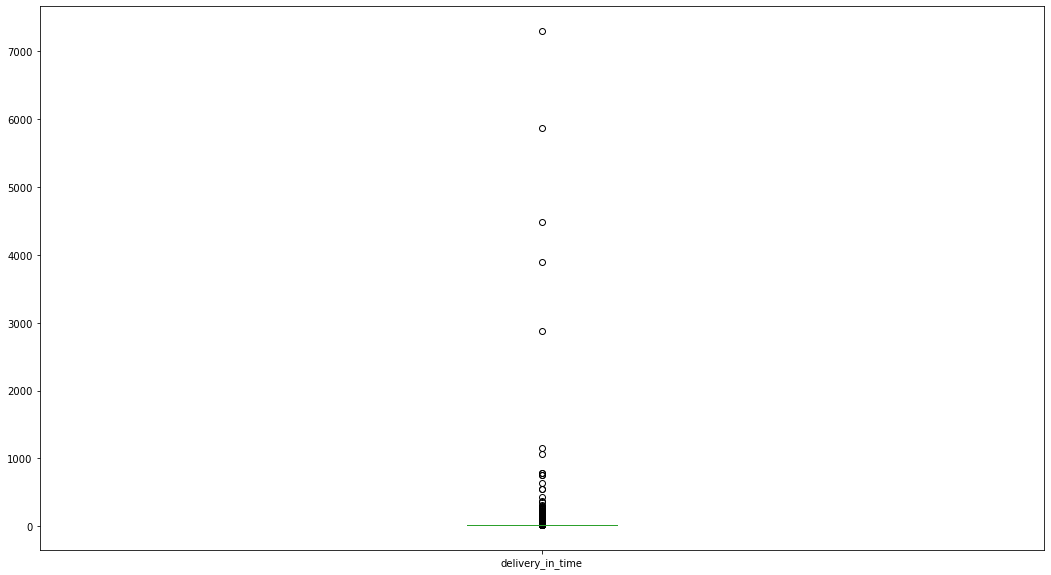

In [466]:
df['delivery_in_time'].plot(kind='box',figsize=(18,10))

In [467]:
df['delivery_in_time'].describe(percentiles=[0.90,0.95,0.9598])

count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
50%         15.797986
90%         21.156905
95%         27.261044
96.0%       30.047378
max       7299.831375
Name: delivery_in_time, dtype: float64

<AxesSubplot:>

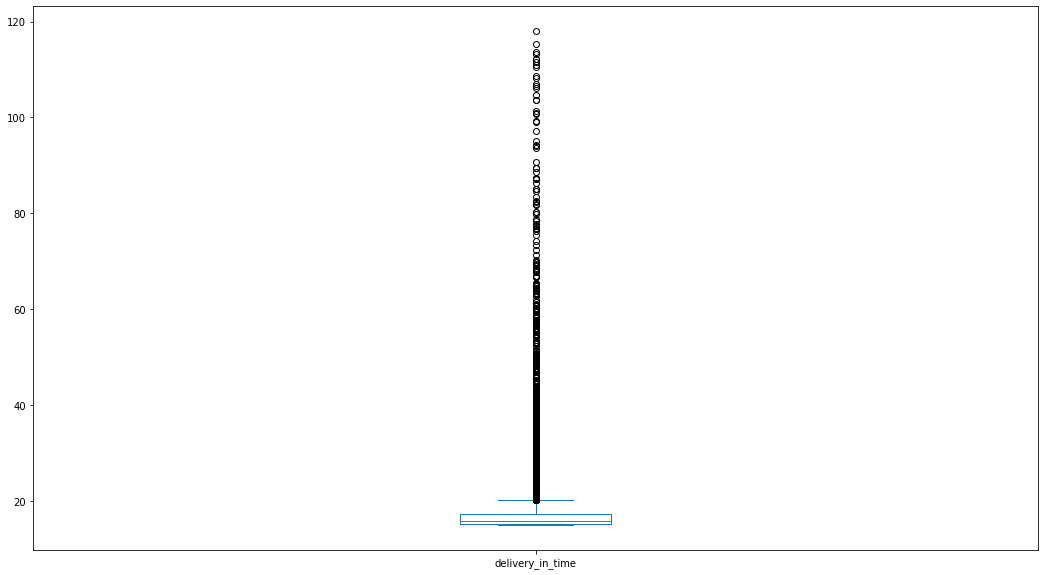

In [468]:
clean_df=df[df.delivery_in_time<=120]
clean_df['delivery_in_time'].plot(kind='box',figsize=(18,10))

In [469]:
clean_df

,order_id,order_placed_time,order_delivered_time,weak_of_day,delivery_in_time
0,1523111,2023-03-30 00:00:59,2023-03-30 00:18:07.443132,Wednesday,17.140719
1,1523112,2023-03-30 00:03:59,2023-03-30 00:19:34.925241,Wednesday,15.598754
2,1523113,2023-03-30 00:07:22,2023-03-30 00:22:28.291385,Wednesday,15.104856
3,1523114,2023-03-30 00:07:47,2023-03-30 00:46:19.019399,Wednesday,38.533657
4,1523115,2023-03-30 00:09:03,2023-03-30 00:25:13.619056,Wednesday,16.176984
...,...,...,...,...,...
14995,1538106,2023-03-30 23:37:05,2023-03-30 23:52:37.409378,Monday,15.540156
14996,1538107,2023-03-30 23:47:38,2023-03-30 00:04:22.672912,Monday,16.744549
14997,1538108,2023-03-30 23:50:16,2023-03-30 00:05:40.676238,Monday,15.411271
14998,1538109,2023-03-30 23:52:44,2023-03-30 00:08:41.810358,Monday,15.963506


In [470]:
table = pd.pivot_table(clean_df, values=['delivery_in_time'], columns=['weak_of_day'],aggfunc={'delivery_in_time': np.mean})
table

weak_of_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
delivery_in_time,17.536175,17.814426,17.878277,17.595514,17.82027,17.983598,17.756675


In [471]:
table1 = pd.pivot_table(clean_df, values=['delivery_in_time'], columns=['weak_of_day'],aggfunc={'delivery_in_time': np.std})
table1

weak_of_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
delivery_in_time,6.072956,6.765252,8.078968,6.655645,7.792529,7.034612,7.359572


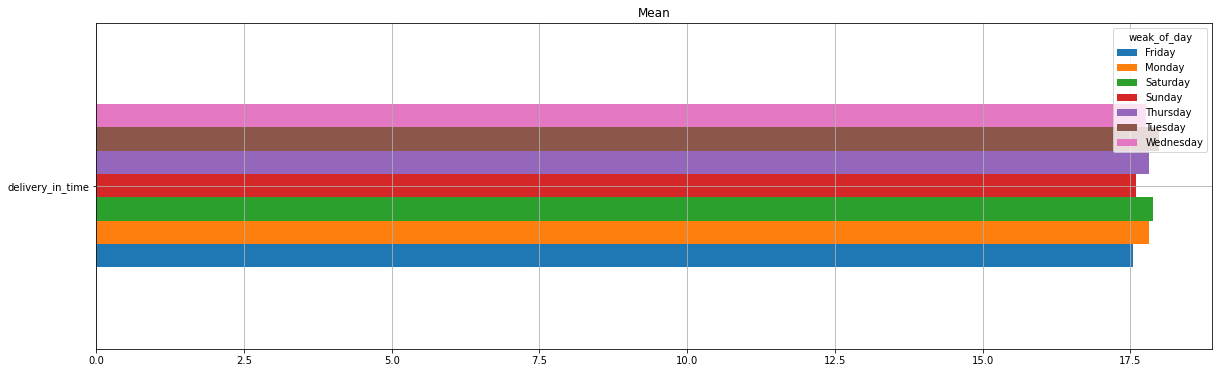

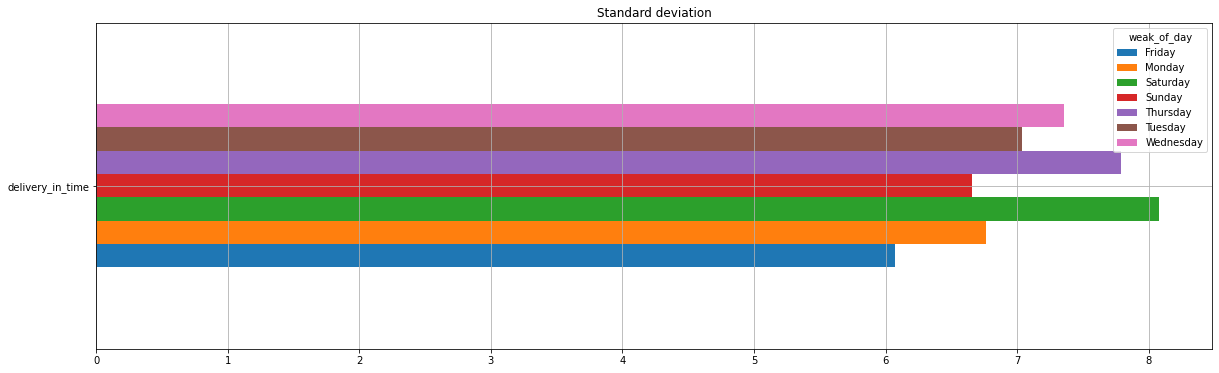

In [472]:
table.plot(kind='barh',figsize=(20,6),title='Mean',grid=True)
table1.plot(kind='barh',figsize=(20,6),title='Standard deviation',grid=True);

# Observation:
        - By observing the above graphs we can conclude that avg delivery time for all week_of_days is approximately equal 
        and  spread is less for Friday so that on friday the performance of delivery executives is best.

In [474]:
clean_df["Delivered_Status"] = (clean_df['delivery_in_time']).apply(lambda n: "Free_Pizza" if n > 30 else ("Delivered_In_Time"))

In [340]:
clean_df.head()

,order_id,order_placed_time,order_delivered_time,weak_of_day,delivery_in_time,Delivered_Status
0,1523111,2023-03-30 00:00:59,2023-03-30 00:18:07.443132,Wednesday,17.140719,Delivered_In_Time
1,1523112,2023-03-30 00:03:59,2023-03-30 00:19:34.925241,Wednesday,15.598754,Delivered_In_Time
2,1523113,2023-03-30 00:07:22,2023-03-30 00:22:28.291385,Wednesday,15.104856,Delivered_In_Time
3,1523114,2023-03-30 00:07:47,2023-03-30 00:46:19.019399,Wednesday,38.533657,Free_Pizza
4,1523115,2023-03-30 00:09:03,2023-03-30 00:25:13.619056,Wednesday,16.176984,Delivered_In_Time


In [341]:
clean_df[clean_df['Delivered_Status']=='Free_Pizza']

,order_id,order_placed_time,order_delivered_time,weak_of_day,delivery_in_time,Delivered_Status
3,1523114,2023-03-30 00:07:47,2023-03-30 00:46:19.019399,Wednesday,38.533657,Free_Pizza
6,1523117,2023-03-30 00:11:09,2023-03-30 00:41:54.245295,Wednesday,30.754088,Free_Pizza
47,1523158,2023-03-30 01:57:16,2023-03-30 02:30:19.851911,Wednesday,33.064199,Free_Pizza
76,1523187,2023-03-30 03:05:16,2023-03-30 03:35:47.166291,Wednesday,30.519438,Free_Pizza
174,1523285,2023-03-30 07:22:11,2023-03-30 08:12:51.906470,Wednesday,50.681774,Free_Pizza
...,...,...,...,...,...,...
14841,1537952,2023-03-30 16:42:37,2023-03-30 17:43:13.294744,Monday,60.604912,Free_Pizza
14855,1537966,2023-03-30 17:16:14,2023-03-30 17:49:07.476278,Monday,32.891271,Free_Pizza
14899,1538010,2023-03-30 19:31:50,2023-03-30 20:08:26.866824,Monday,36.614447,Free_Pizza
14939,1538050,2023-03-30 21:17:20,2023-03-30 21:54:03.464048,Monday,36.724401,Free_Pizza


In [344]:
df2=pd.crosstab(clean_df['Delivered_Status'],clean_df['weak_of_day'],margins=True)
df2

weak_of_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Delivered_Status,,,,,,,
Delivered_In_Time,2142,2156,2123,2105,2191,1504,2175
Free_Pizza,74,88,78,72,80,69,74


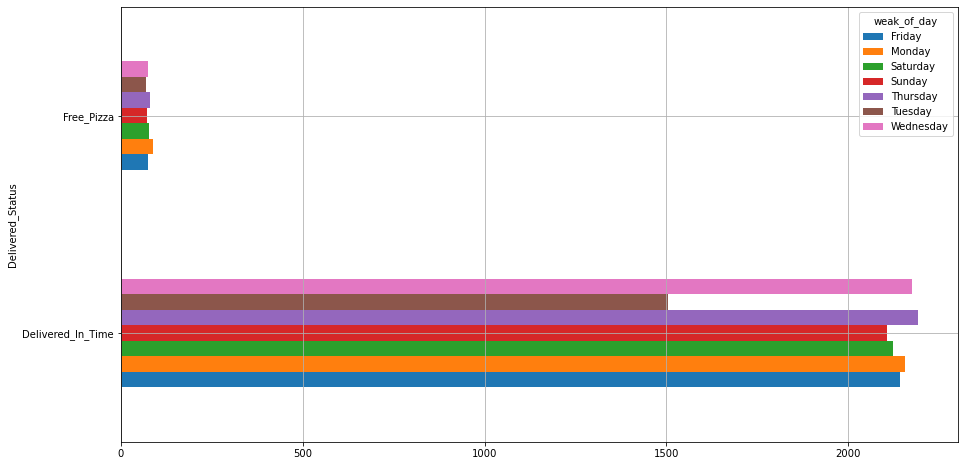

In [345]:
df2.plot(kind='barh',figsize=(15,8),grid=True);

# Observation:
    - From these we can say that On tueday They are anable to deliver to most pizzas in time
    - On monday Free_pizzas are mostly delivered  

In [475]:
clean_df['ordered_time']=clean_df['order_placed_time'].apply(lambda x:str(x).split()[1])

In [476]:
clean_df['Hours']=clean_df['ordered_time'].apply(lambda x:str(x).split(':')[0])

In [363]:
clean_df.tail(20)

,order_id,order_placed_time,order_delivered_time,weak_of_day,delivery_in_time,Delivered_Status,ordered_time,Hours
14980,1538091,2023-03-30 23:05:07,2023-03-30 23:20:26.761142,Monday,15.329352,Delivered_In_Time,23:05:07,23
14981,1538092,2023-03-30 23:12:59,2023-03-30 23:30:18.502010,Monday,17.325033,Delivered_In_Time,23:12:59,23
14982,1538093,2023-03-30 23:13:48,2023-03-30 23:37:13.388767,Monday,23.423146,Delivered_In_Time,23:13:48,23
14983,1538094,2023-03-30 23:14:26,2023-03-30 23:29:28.348675,Monday,15.039145,Delivered_In_Time,23:14:26,23
14984,1538095,2023-03-30 23:17:14,2023-03-30 23:32:30.638512,Monday,15.277309,Delivered_In_Time,23:17:14,23
14985,1538096,2023-03-30 23:25:37,2023-03-30 23:41:27.429634,Monday,15.840494,Delivered_In_Time,23:25:37,23
14986,1538097,2023-03-30 23:25:48,2023-03-30 23:41:52.659019,Monday,16.077650,Delivered_In_Time,23:25:48,23
14987,1538098,2023-03-30 23:26:27,2023-03-30 23:43:01.339505,Monday,16.572325,Delivered_In_Time,23:26:27,23
14988,1538099,2023-03-30 23:27:58,2023-03-30 23:45:03.815189,Monday,17.096920,Delivered_In_Time,23:27:58,23
14989,1538100,2023-03-30 23:28:25,2023-03-30 23:43:53.334274,Monday,15.472238,Delivered_In_Time,23:28:25,23


In [477]:
clean_df['Hours']=clean_df['Hours'].astype('int')

In [478]:
import seaborn as sns

In [479]:
clean_df["four_quarters_day"] = pd.cut(clean_df["Hours"],bins=[-1,3,7,11,15,19,23],labels=["Midnight","morning","late_morning","afternoon","evening","night"])

In [431]:
clean_df

,order_id,order_placed_time,order_delivered_time,weak_of_day,delivery_in_time,Delivered_Status,ordered_time,Hours,four_quarters_day
0,1523111,2023-03-30 00:00:59,2023-03-30 00:18:07.443132,Wednesday,17.140719,Delivered_In_Time,00:00:59,0,Midnight
1,1523112,2023-03-30 00:03:59,2023-03-30 00:19:34.925241,Wednesday,15.598754,Delivered_In_Time,00:03:59,0,Midnight
2,1523113,2023-03-30 00:07:22,2023-03-30 00:22:28.291385,Wednesday,15.104856,Delivered_In_Time,00:07:22,0,Midnight
3,1523114,2023-03-30 00:07:47,2023-03-30 00:46:19.019399,Wednesday,38.533657,Free_Pizza,00:07:47,0,Midnight
4,1523115,2023-03-30 00:09:03,2023-03-30 00:25:13.619056,Wednesday,16.176984,Delivered_In_Time,00:09:03,0,Midnight
...,...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-30 23:37:05,2023-03-30 23:52:37.409378,Monday,15.540156,Delivered_In_Time,23:37:05,23,night
14996,1538107,2023-03-30 23:47:38,2023-03-30 00:04:22.672912,Monday,16.744549,Delivered_In_Time,23:47:38,23,night
14997,1538108,2023-03-30 23:50:16,2023-03-30 00:05:40.676238,Monday,15.411271,Delivered_In_Time,23:50:16,23,night
14998,1538109,2023-03-30 23:52:44,2023-03-30 00:08:41.810358,Monday,15.963506,Delivered_In_Time,23:52:44,23,night


In [432]:
clean_df["four_quarters_day"].value_counts()

night           2541
late_morning    2505
morning         2486
evening         2476
afternoon       2472
Midnight        2451
Name: four_quarters_day, dtype: int64

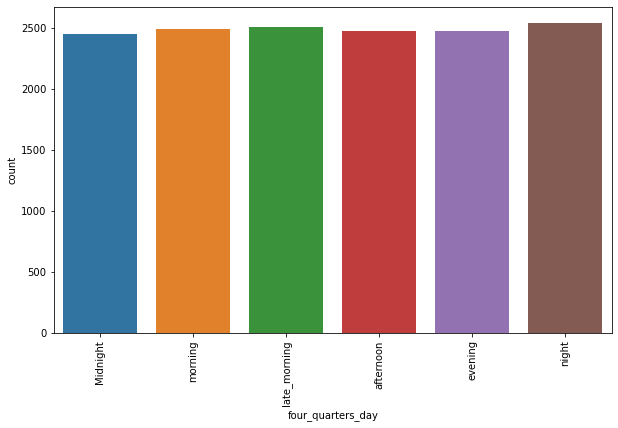

In [480]:
plt.figure(figsize=(10,6))
sns.countplot(clean_df['four_quarters_day'])
plt.xticks(rotation=90);

# Observation 
 - As per the above graph we say that in all aspects of day total orders are almost equal but in night they received more orders when compare to others.